# Módulo 10 atividade 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prev= pd.read_csv('previsao_de_renda.csv')

In [5]:
prev = prev.drop(['Unnamed: 0', 'index', 'mau'], axis =1)

In [10]:
prev = prev.dropna()

In [12]:
prev.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [19]:
var_quant = prev[['idade', 'renda', 'tempo_emprego', 'qt_pessoas_residencia']] 
var_quant.corr() # Matriz de Correlação

,idade,renda,tempo_emprego,qt_pessoas_residencia
idade,1.000000,0.151364,0.323934,-0.257281
renda,0.151364,1.000000,0.394235,-0.004865
tempo_emprego,0.323934,0.394235,1.000000,-0.065748
qt_pessoas_residencia,-0.257281,-0.004865,-0.065748,1.000000


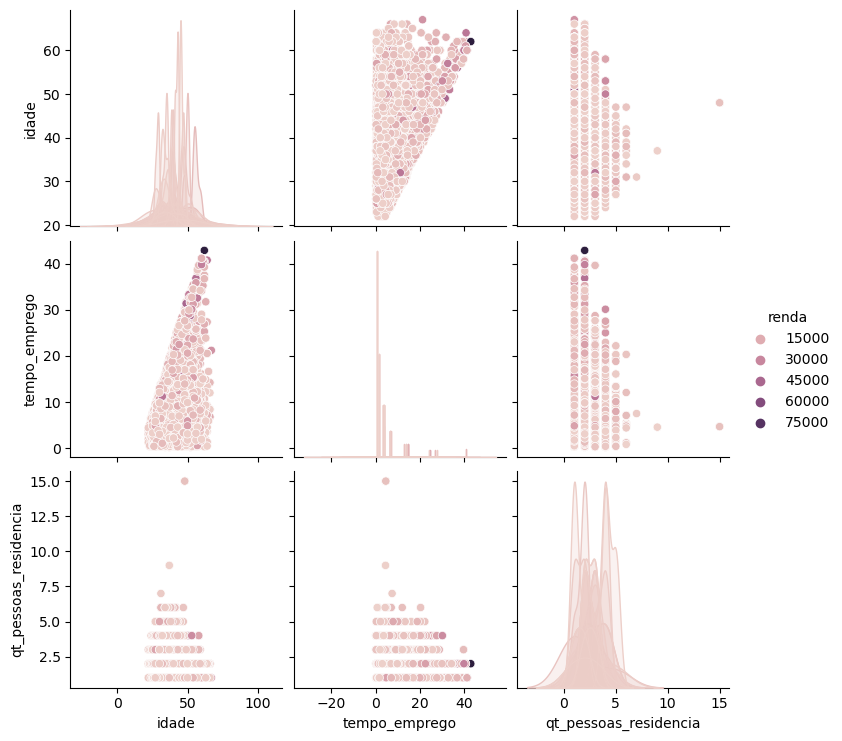

In [20]:
sns.pairplot(var_quant, hue = 'renda')

#### Análise:
    Através da observação da matriz de correlação, pude notar que o tempo de emprego apresenta uma correlação considerável com a renda.
    Já analisando a matriz de dispersão foi possível observar que mais idade aliada à mais tempo de emprego resultam em uma maior renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

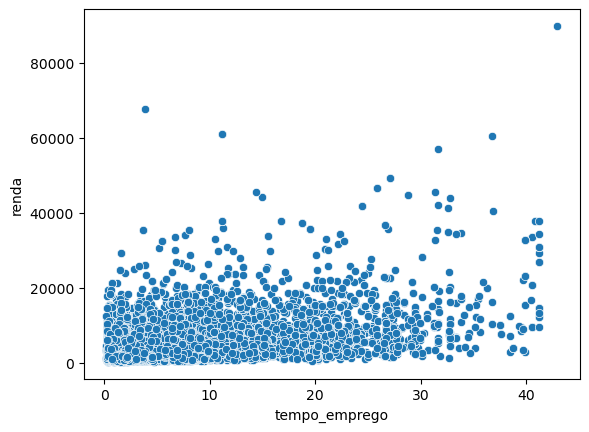

In [23]:
sns.scatterplot(data = var_quant, x ='tempo_emprego', y = 'renda')

3) Na su aopinião, há outliers na variável renda?

Sim, pude observar a presença de Outliers na variável 'renda', pois há pontos muito dispersos ao longo do gráfico.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [24]:
var_quant_log = var_quant.copy() # Copiando df

In [26]:
var_quant_log['log_renda'] = np.log(var_quant_log['renda']) # Gerando coluna com os valores Log de renda

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

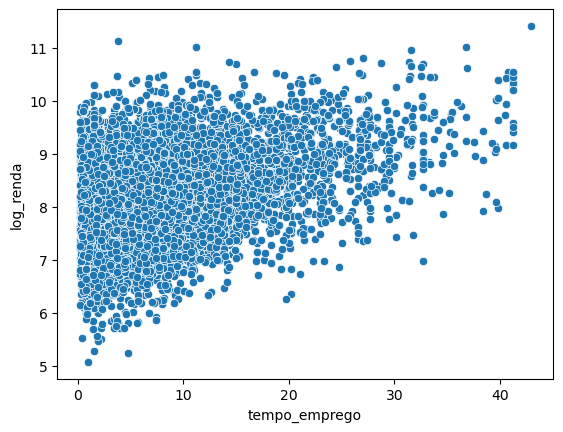

In [30]:
sns.scatterplot(data = var_quant_log, x = 'tempo_emprego', y = 'log_renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Houve uma melhora considerável na dispersão dos valores da renda aplicando o Log, com certeza ele é de grande utilidade.